<a href="https://colab.research.google.com/github/SUJOY-RAY/Machine-Learning-in-python/blob/main/object_detection_using_resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [19]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag',
    'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite',
    'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana',
    'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table',
    'toilet', 'TV', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock',
    'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]


In [8]:
model=fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 100MB/s]


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [9]:
def load_image(image_path):
  image=Image.open(image_path).convert("RGB")
  return image

In [10]:
def preprocess(image):
  image=F.to_tensor(image)
  return image

In [21]:
def visualize(image,boxes,labels,scores,threshold=0.5):
  image=np.array(image)
  plt.figure(figsize=(12,8))
  plt.imshow(image)
  ax=plt.gca()

  for box,label,score in zip(boxes,labels,scores):
    if score>threshold:
      xmin,ymin,xmax,ymax=box
      rect=plt.Rectangle((xmin,ymin),xmax-xmin,ymax-ymin,
                        fill=False,color='red',linewidth=2)
      ax.add_patch(rect)
      label_text=f'{COCO_INSTANCE_CATEGORY_NAMES[label]}:{score:.2f}'
      ax.text(xmin,ymin,label_text,bbox={'facecolor':'white','alpha':0.5})

  plt.axis('off')
  plt.show()

In [20]:
def print_detected_objects(labels, scores, threshold=0.5):
    for label, score in zip(labels, scores):
        if score > threshold:
            print(f'{COCO_INSTANCE_CATEGORY_NAMES[label]}: {score:.2f}')

In [22]:
image_path="/content/photo.jpg"
image=load_image(image_path)
input_tensor=preprocess(image)
input_tensor=input_tensor.unsqueeze(0)

with torch.no_grad():
  predictions=model(input_tensor)

pred_boxes=predictions[0]['boxes'].numpy()
pred_labels=predictions[0]['labels'].numpy()
pred_scores=predictions[0]['scores'].numpy()

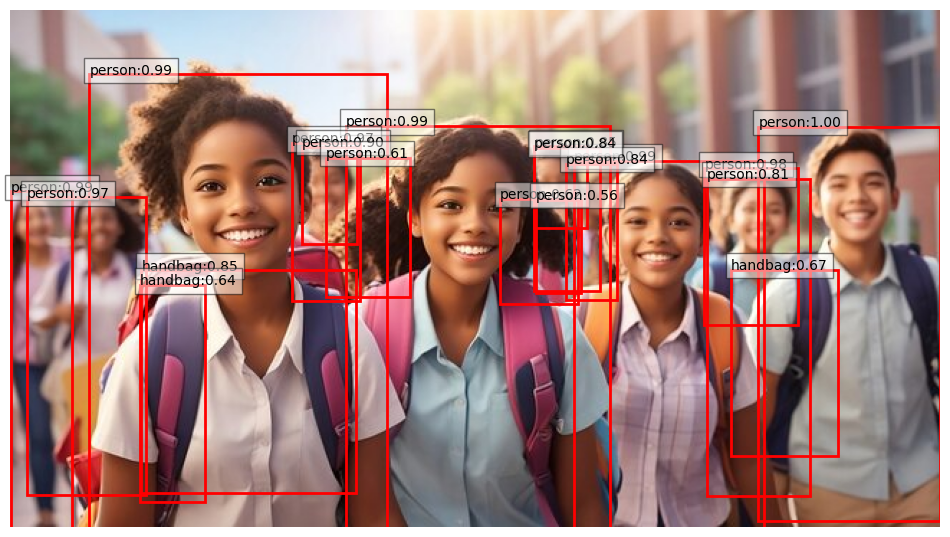

In [23]:
visualize(image,pred_boxes,pred_labels,pred_scores, threshold=0.5)